In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, stratify = iris.target, random_state = 100 )

In [9]:
np.bincount(y_train)

array([40, 40, 40], dtype=int64)

In [11]:
X_train_df = pd.DataFrame(X_train, columns = iris.feature_names)
y_train_df = pd.DataFrame(y_train, columns = ['class'])
X_y_train_df = pd.concat([X_train_df, y_train_df], axis = 1)

In [12]:
X_y_train_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.8,2.6,4.0,1.2,1
1,5.9,3.0,4.2,1.5,1
2,6.5,3.0,5.5,1.8,2
3,6.7,3.1,4.4,1.4,1
4,7.9,3.8,6.4,2.0,2


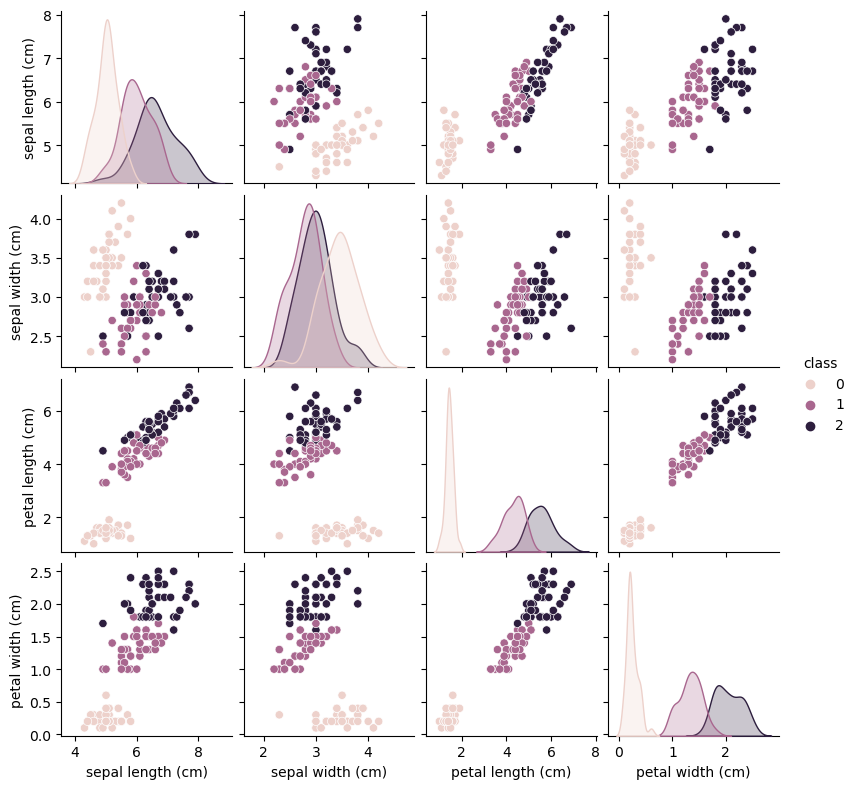

In [13]:
sns.pairplot(X_y_train_df, hue = 'class', height = 2)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train_scale = scaler.transform(X_train)

In [19]:
X_test_scale = scaler.transform(X_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [22]:
knn = KNN(n_neighbors = 3)

In [24]:
knn.fit(X_train_scale, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
x_test = np.array([[5.5, 2, 1.1, 0.6]])

In [26]:
x_test_scale = scaler.transform(x_test)

In [28]:
y_test_prediction = knn.predict(x_test_scale)

C:\Users\John\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
y_test_prediction

array([1])

In [30]:
X_y_test_prediction = knn.predict(X_test_scale)

C:\Users\John\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
error_est = y_test != X_y_test_prediction 

In [32]:
error_est

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False])

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
print(f'The accuracy of the KNN model is {accuracy_score(y_test, X_y_test_prediction): 0.2f}')

The accuracy of the KNN model is  0.90
